# Estadística Descriptiva

La estadística descriptiva es una rama de la estadística que se encarga de recolectar, analizar, interpretar y presentar datos de manera organizada y efectiva. Su principal objetivo es proporcionar resúmenes simples y comprensibles acerca de las características principales de un conjunto de datos, sin llegar a hacer inferencias o predicciones sobre una población más amplia.

# Lectura de datos

In [23]:
## Importar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
## Cargar dataset
df = pd.read_excel('./aprobacion_curso.xlsx')
df.head()

,ID,Año - Semestre,Felder,Examen_admisión,Nota_final,Aprobo
0,1,2016-01,sensorial,4.67,3.1,si
1,2,2016-01,activo,4.17,2.1,no
2,3,2016-01,visual,4.50,3.1,si
3,4,2016-01,visual,3.83,1.6,no
4,5,2016-01,equilibrio,3.00,2.3,no


In [22]:
### Imformación del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               183 non-null    int64  
 1   Año - Semestre   183 non-null    object 
 2   Felder           183 non-null    object 
 3   Examen_admisión  181 non-null    float64
 4   Nota_final       183 non-null    float64
 5   Aprobo           183 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 8.7+ KB


In [18]:
# Dimensión del dataframe
df.shape

(183, 6)

In [19]:
# Descriptivo
df[['Examen_admisión','Nota_final']].describe()

,Examen_admisión,Nota_final
count,181.000000,183.000000
mean,3.826851,2.644809
std,0.824674,0.735118
min,0.000000,0.800000
25%,3.500000,2.200000
50%,3.830000,2.600000
75%,4.330000,3.100000
max,5.000000,5.500000


In [11]:
df.Nota_final.mean()

2.644808743169398

In [12]:
df.Nota_final.max()-df.Nota_final.min()

4.7

In [13]:
## Revisión de estudiantes con examen de admisión en 0
df.query("Examen_admisión==0.0")

,ID,Año - Semestre,Felder,Examen_admisión,Nota_final,Aprobo
82,83,2014-01,verbal,0.0,1.9,no
120,121,2014-02,activo,0.0,1.6,no
178,179,2018-02,verbal,0.0,1.9,no


In [14]:
# Descriptivos variables cat
df.describe(include=[object])

,Año - Semestre,Felder,Aprobo
count,183,183,183
unique,10,8,2
top,2014-01,visual,no
freq,40,63,108


In [ ]:
## Porcentaje de estudiantes con curso perdido
df.Aprobo.value_counts(normalize=True)

no    0.590164
si    0.409836
Name: Aprobo, dtype: float64

## Visualización de datos

<ipython-input-16-8058f63cbac5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Examen_admisión);


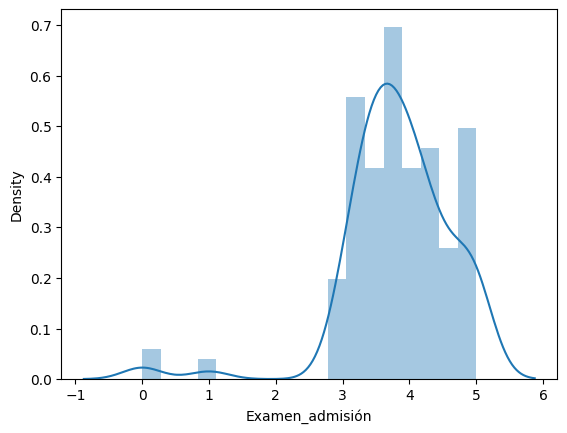

In [ ]:
sns.distplot(df.Examen_admisión);

In [ ]:
# Asimetría
df.Examen_admisión.skew()

-1.816264032360341

In [ ]:
# Curtosis
df.Examen_admisión.kurtosis()

7.200059881166032

<ipython-input-18-41cc5b4b9219>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Nota_final);


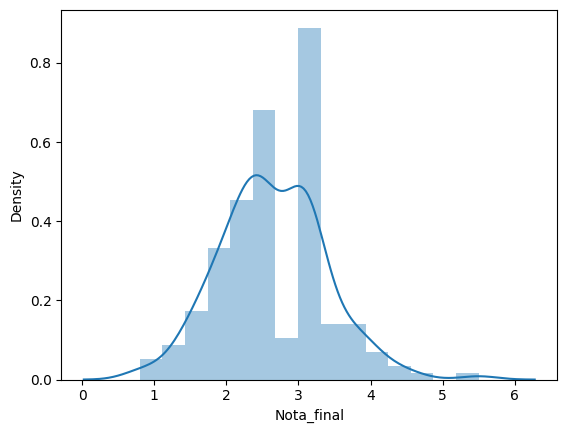

In [ ]:
sns.distplot(df.Nota_final);

In [ ]:
# Asimetría
df.Nota_final.skew()

0.32364956823508834

In [ ]:
df.Nota_final.kurtosis()

0.8066338514649138

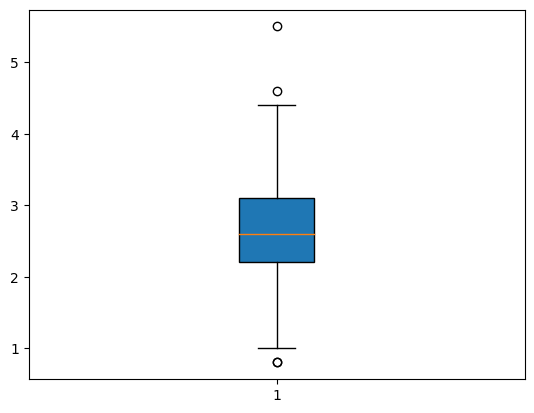

In [ ]:
## Cajas y bigotes

plt.boxplot(df[['Nota_final']],vert=True,patch_artist=True);

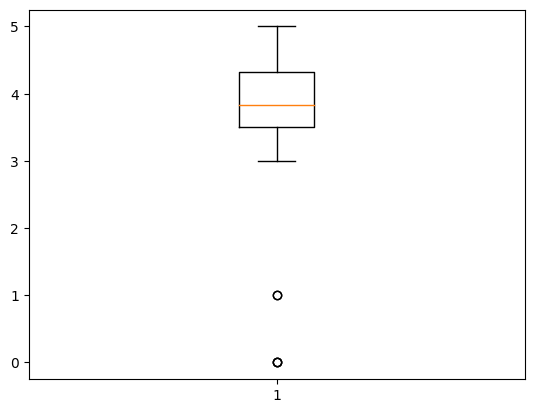

In [ ]:
plt.boxplot(df[df['Examen_admisión'].isna()==False]['Examen_admisión']);

,ID,Año - Semestre,Felder,Examen_admisión,Nota_final,Aprobo
0,1,2016-01,sensorial,4.67,3.1,si
1,2,2016-01,activo,4.17,2.1,no
2,3,2016-01,visual,4.50,3.1,si
3,4,2016-01,visual,3.83,1.6,no
4,5,2016-01,equilibrio,3.00,2.3,no
...,...,...,...,...,...,...
178,179,2018-02,verbal,0.00,1.9,no
179,180,2018-02,visual,3.00,3.1,si
180,181,2018-02,equilibrio,5.00,3.0,si
181,182,2018-02,equilibrio,3.17,1.3,no


In [ ]:
df[['Examen_admisión']]

,Examen_admisión
0,4.67
1,4.17
2,4.50
3,3.83
4,3.00
...,...
178,0.00
179,3.00
180,5.00
181,3.17


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


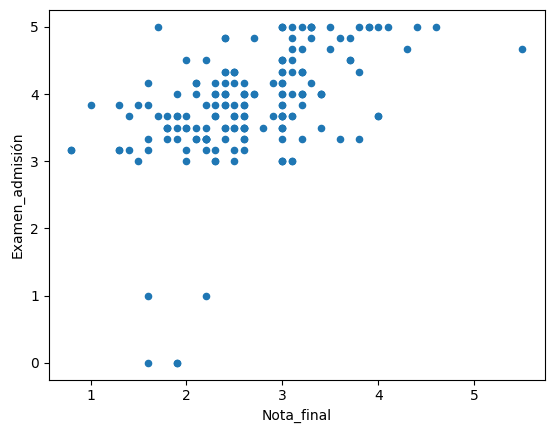

In [ ]:
## Relación entre Nota final y examen de admisión
df.plot.scatter(x='Nota_final',y='Examen_admisión',cmap='coolwarm');

In [ ]:
## Correlación
df.Examen_admisión.corr(df.Nota_final)

0.4863153192072082

<Axes: >

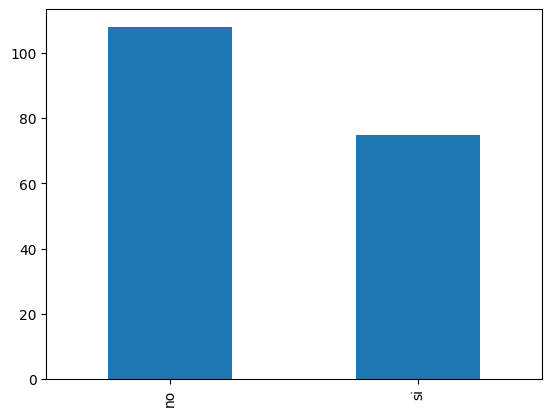

In [ ]:
df['Aprobo'].value_counts().plot.bar()

<Axes: >

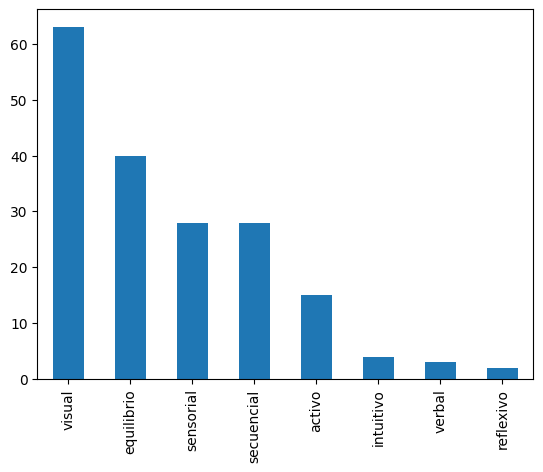

In [ ]:
df['Felder'].value_counts().plot.bar()

In [ ]:
df.groupby(['Aprobo','Felder'])[['Felder']].count()

Felder
Aprobo Felder            
no     activo          10
       equilibrio      25
       intuitivo        4
       reflexivo        1
       secuencial      15
       sensorial       17
       verbal           3
       visual          33
si     activo           5
       equilibrio      15
       reflexivo        1
       secuencial      13
       sensorial       11
       visual          30

In [ ]:
df.groupby(['Aprobo'])[['Nota_final','Examen_admisión']].mean()

NameError: ignored